<a href="https://colab.research.google.com/github/BibhuDas123/Exploratory_Data_Analysis/blob/master/Housing_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
#bring in the six packs
from google.colab import files

uploaded = files.upload()

Saving train.csv to train (1).csv


In [7]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "train.csv" with length 460676 bytes


In [13]:
df_train = pd.read_csv('train.csv')
df_train.columns
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


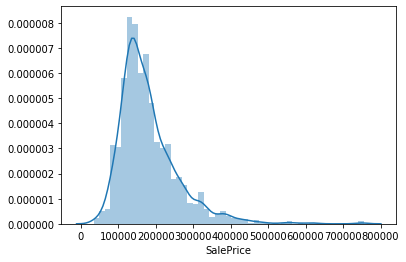

In [17]:
#histogram
sns.distplot(df_train['SalePrice']);
#Deviate from the normal distribution.
#Have appreciable positive skewness.
#Show peakedness.

#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

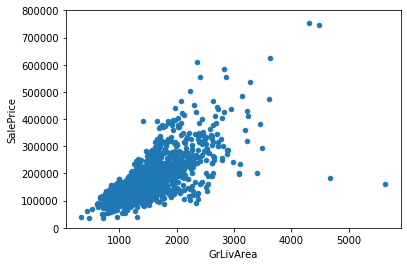

In [18]:
#relationship with numerical variables
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
#Hmmm... It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a linear relationship.

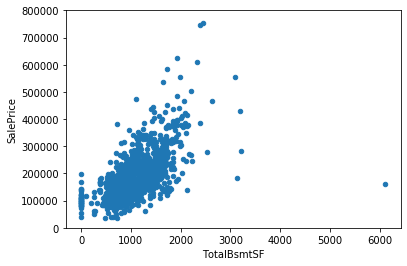

In [19]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
#'TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship!
# Everything is ok and suddenly, in a strong linear (exponential?) reaction, everything changes. Moreover, it's clear 
#that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.

(-0.5, 9.5, 0, 800000)

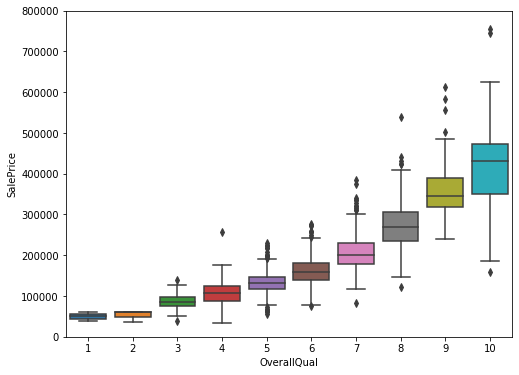

In [20]:
#relationship with categorical variables
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
#house with higher sales enjoys higher cost

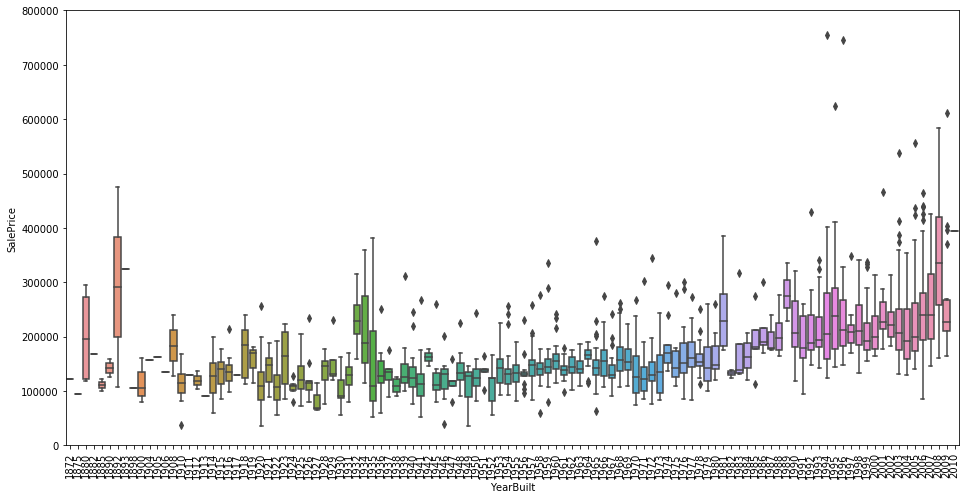

In [21]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);
#Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.
# we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. 
#If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

#Summary
#'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. 
#Both relationships are positive, which means that as one variable increases, the other also increases. 
#In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
#'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of
# 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

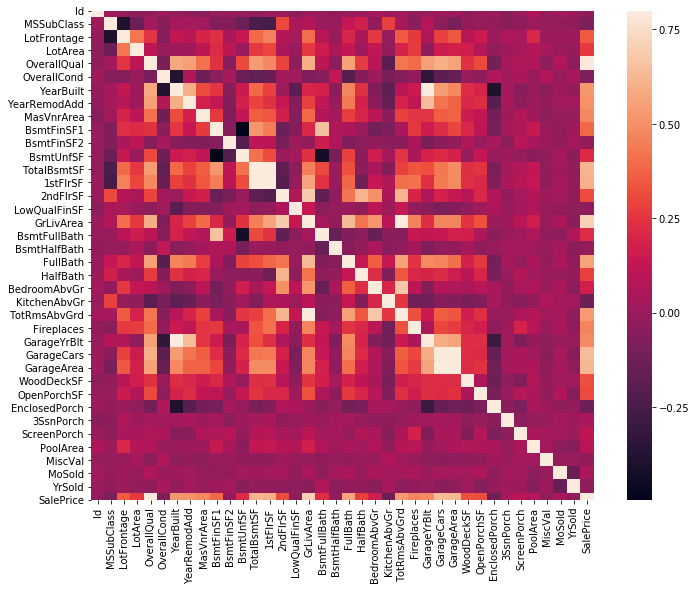

In [22]:
#Correlation matrix (heatmap style).
#'SalePrice' correlation matrix (zoomed heatmap style).
#Scatter plots between the most correlated variables (move like Jagger style).

#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#At first sight, there are two red colored squares that get my attention. 
#The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. 
#Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that 
#it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost 
#the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems
# dominated by feature selection, like ours, they are an essential tool.Another thing that got my attention was the 'SalePrice'
# correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also 
#see many other variables that should be taken into account. That's what we will do next.

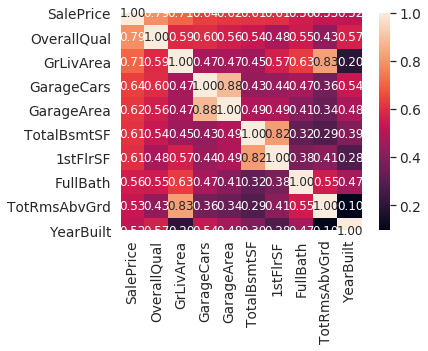

In [25]:
#SalePrice correlation matrix (zoomed heatmap style)
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

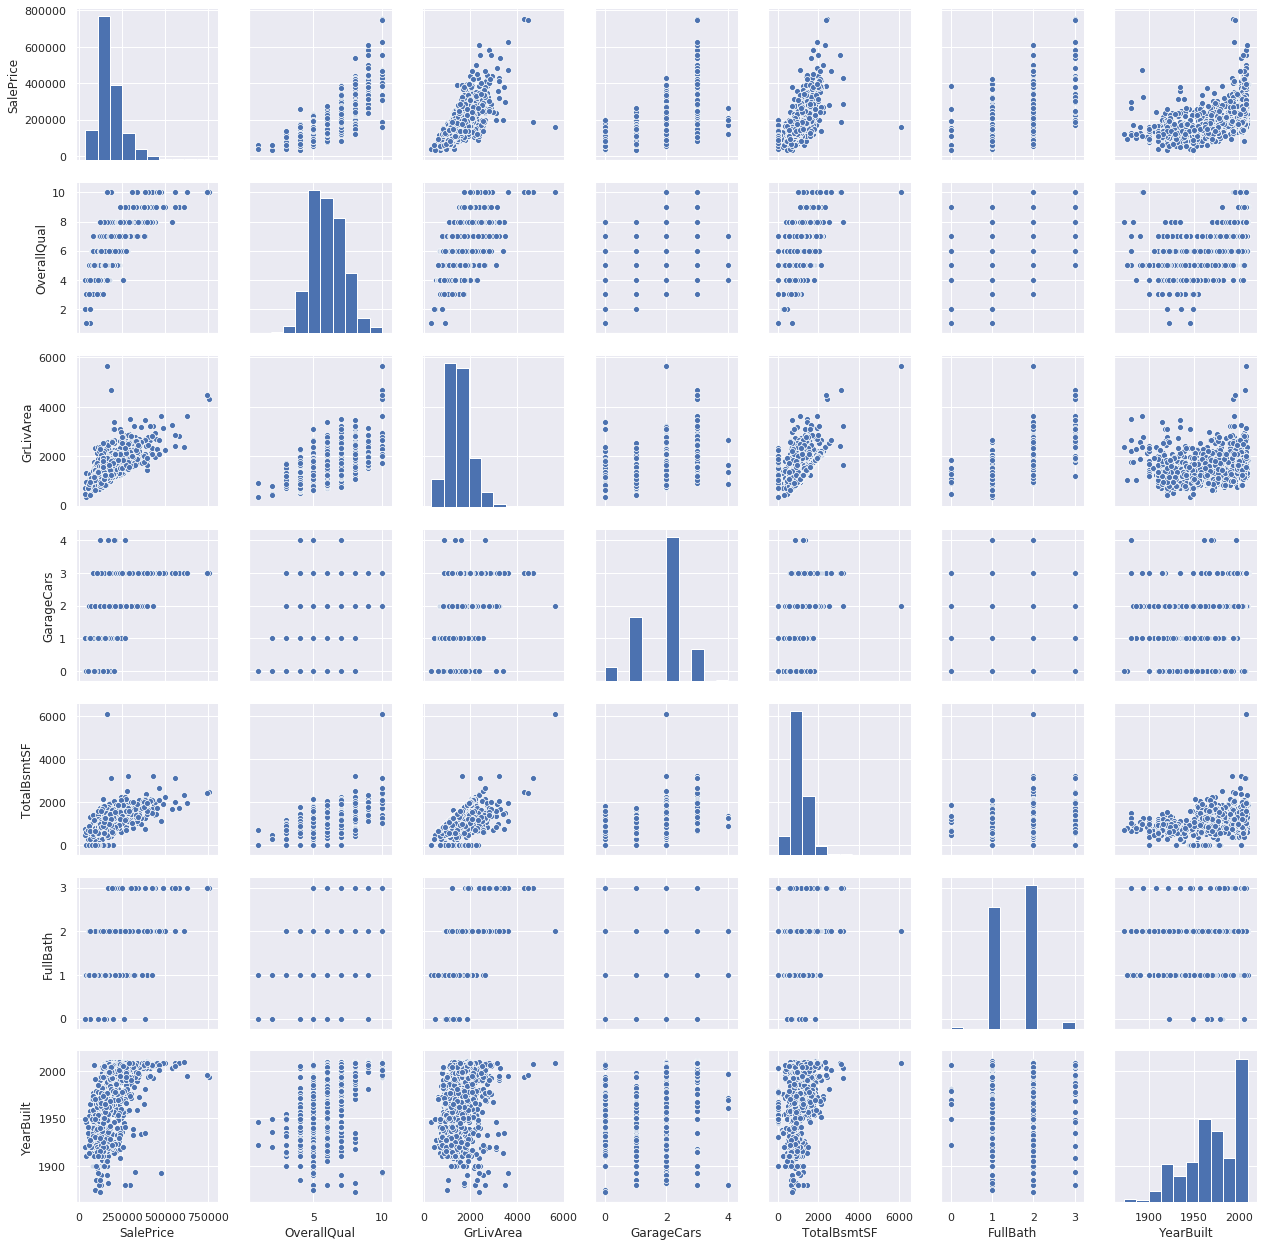

In [26]:
#'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
#'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. 
#However, as we discussed in the last sub-point, the number of cars that fit into the garage 
#is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. 
#You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis
# (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
#'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. 
#We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
#'FullBath'?? Really? 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
# 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. 
#Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis 
#to get this right.

#Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [0]:
#One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots 
#drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. 
#Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living
# area (unless you're trying to buy a bunker).

#The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. 
#In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative).
# We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). 
#Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

In [27]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

#We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. 
#This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables 
#(e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete.The point is: will we miss this data? I don't think so. 
#None of these variables seem to be very important, since most of them are not aspects in which we think about when 
#buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, 
#we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, 
#so we'll be happy to delete them.

#In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. 
#I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in5  problems). 
#Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, 
#I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.
#Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation 
#with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.
#Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [28]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [33]:
df_train.count()
#Univariate analysis
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


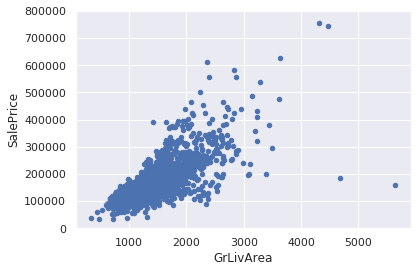

In [34]:
#Low range values are similar and not too far from 0.High range values are far from 0 and the 7.something values are really out of range.
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
#The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. 
#Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that 
#these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

#The two observations in the top of the plot are those 7.something observations that we said we should be careful about. 
#They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


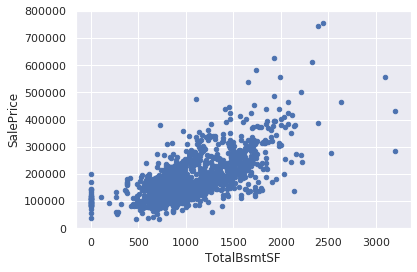

In [36]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
#df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
#df_train = df_train.drop(df_train[df_train['Id'] == 524].index)
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
#We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

In [0]:
#Statastical measures
#Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several
# statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach).
# Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to 
#take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, 
#we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

#Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance
 #across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same 
 #across all values of the independent variables.

 #Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear,
 # it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear 
 #to have linear relationships.

 #Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. 
 #For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables.
 # This occurs often in time series, where some patterns are time related. We'll also not get into this. 
 #However, if you detect something, try to add a variable that can explain the effect you're getting. 
 #That's the most common solution for correlated errors.


 #The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

#Histogram - Kurtosis and skewness.
#Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.



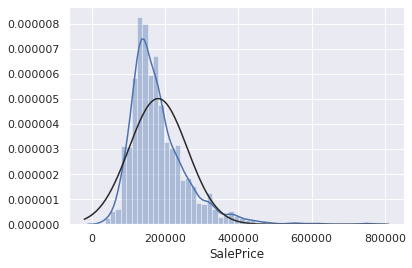

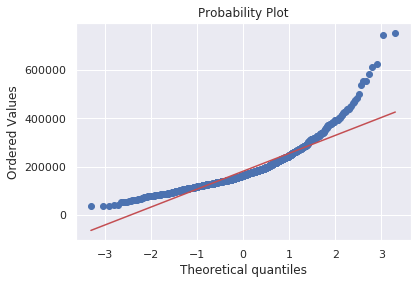

In [37]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
#Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.
#But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in 
#statistical books: in case of positive skewness, log transformations usually works well. 
#When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

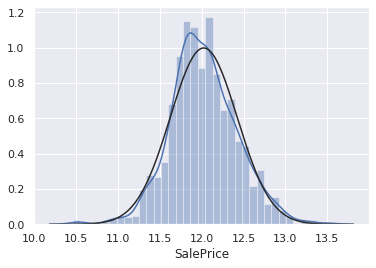

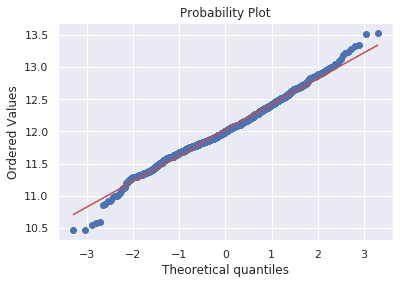

In [38]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

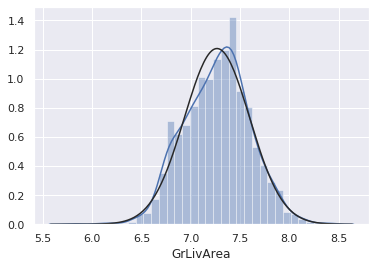

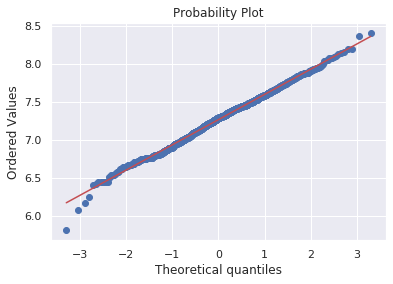

In [39]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

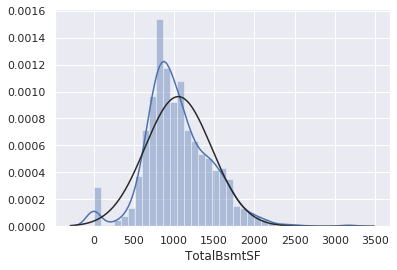

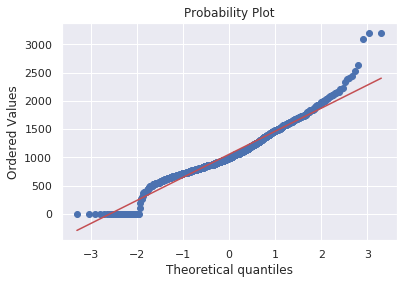

In [40]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)
#Ok, now we are dealing with the big boss. What do we have here?

#Something that, in general, presents skewness.A significant number of observations with value zero (houses without basement).
#A big problem because the value zero doesn't allow us to do log transformations.
#To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). 
#Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data,
# without losing the effect of having or not basement.

In [0]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

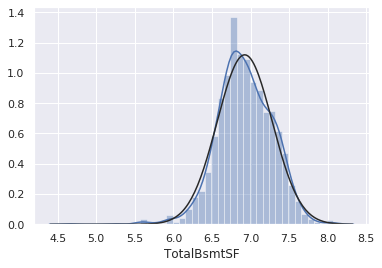

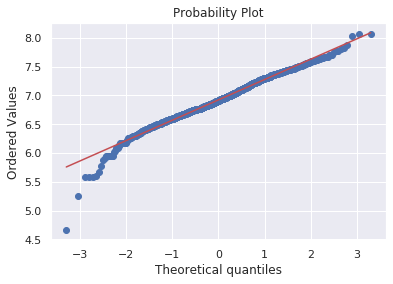

In [42]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

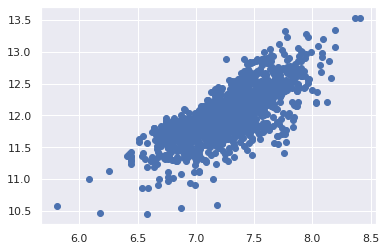

In [43]:
#The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such 
#shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds 
#(a large number of points at the center of the distribution).
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

#Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' 
#and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. 
#That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

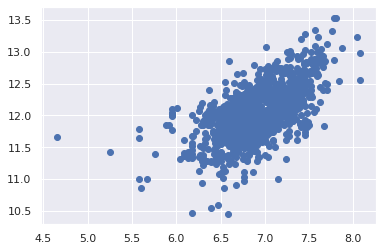

In [44]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);
#We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

In [0]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)